In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
d = data[8011]
print(d.family)

Style_A


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

maxiter wrong


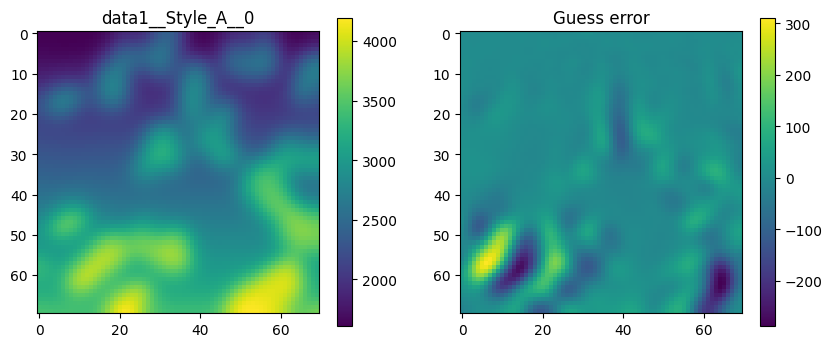

diag 1.9656961788752064e-05


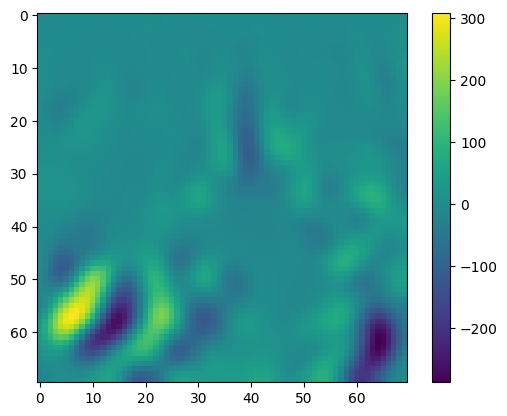

False True
(4901, 1073)
0.00043503787149956993
6.678962482771418e-13
gn 0.008755746334479142
151.79834849426587
(1073, 1)


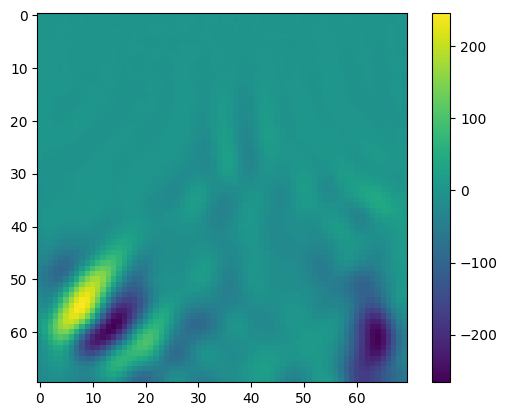

True True
(4901, 1073)
5.802553597852874e-06
6.662159975660425e-13
gn 0.0010892692526460487
2.3310783914833944
(1073, 1)


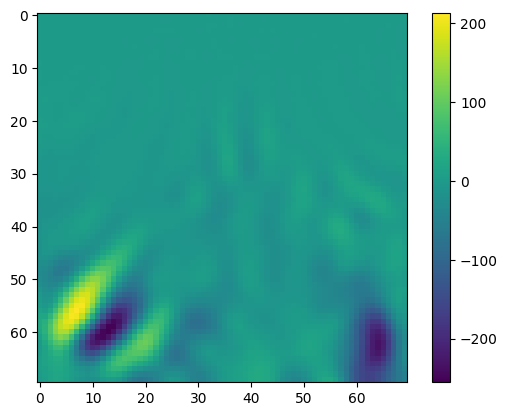

True True
(4901, 1073)
4.4851009699909745e-08
6.686931737122773e-13
gn 0.0005369859192509665
0.3057479128221063
(1073, 1)


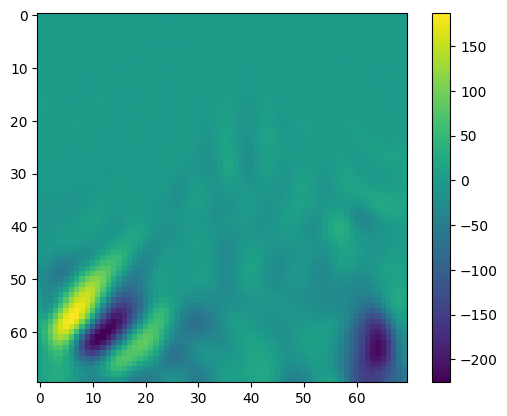

True True
(4901, 1073)
8.075723530987528e-08
6.683531180162028e-13
gn 0.0004252917293502206
0.3273441289377878
(1073, 1)


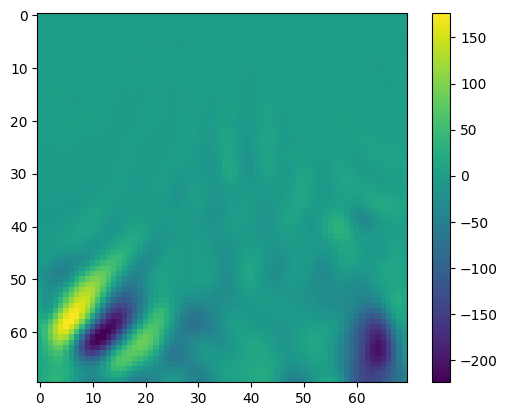

True True
(4901, 1073)
1.2141221499219412e-08
6.687822922256732e-13
gn 0.00037542707198039203
0.31479587211095433
(1073, 1)
range:  -148.45147342884195 75.46811578006712


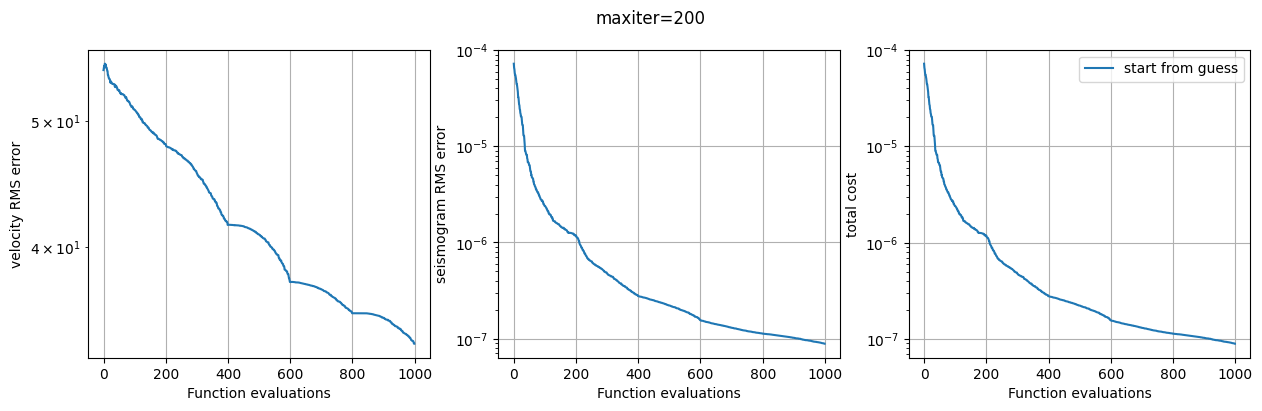

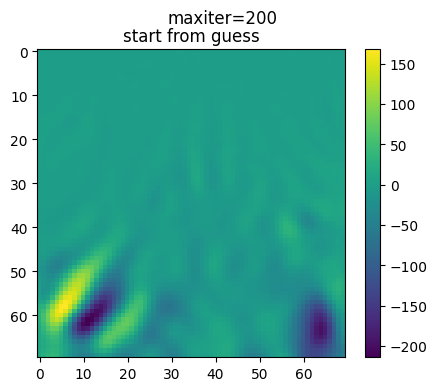

diag 1.9656961788752064e-05


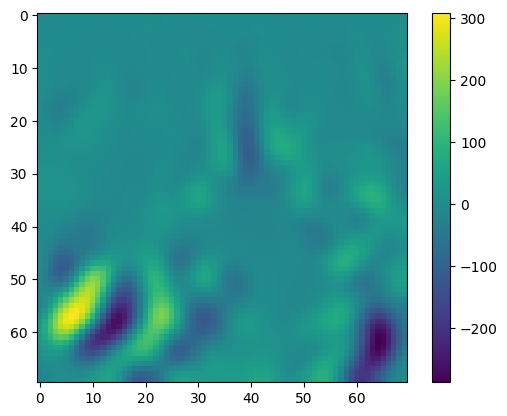

False True
(4901, 1073)
0.00043503787149956993
6.678962482771418e-13
gn 0.008755746334479142
151.79834849426587
(1073, 1)


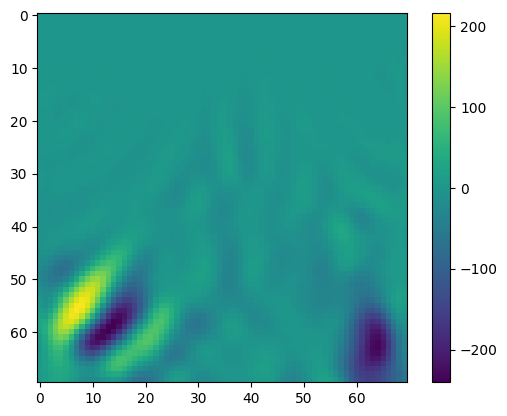

True True
(4901, 1073)
6.869081220956368e-06
6.669315683097914e-13
gn 0.0008617241935843751
2.7071157819383855
(1073, 1)


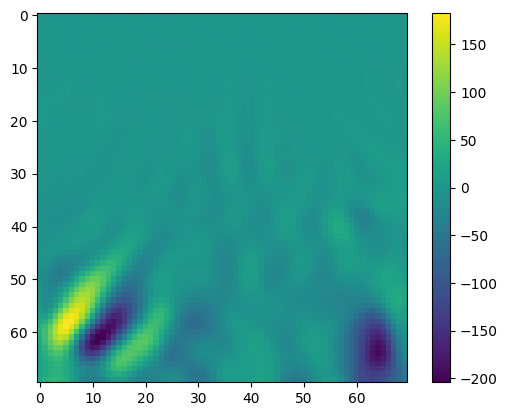

True True
(4901, 1073)
1.291357319241041e-07
6.693950038536057e-13
gn 0.0003639474812268334
0.2787537881682965
(1073, 1)


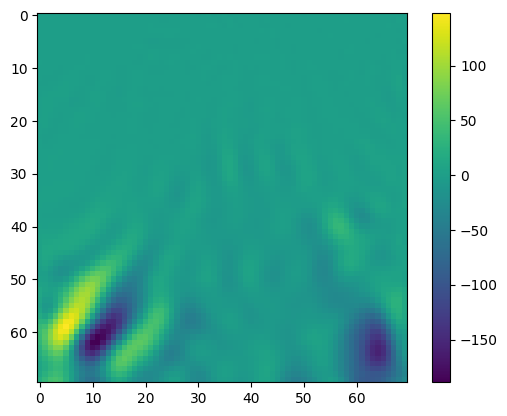

True True
(4901, 1073)
7.482652731087518e-08
6.696661375036219e-13
gn 0.00030967088894126604
0.3392650718429332
(1073, 1)


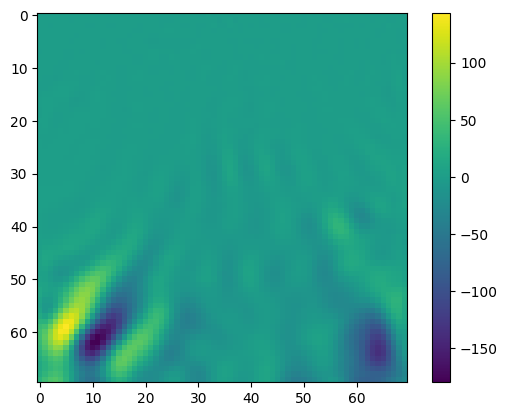

True True
(4901, 1073)
1.6445633258585292e-07
6.701751655679322e-13
gn 0.00029109090265122653
0.2617073073364774
(1073, 1)
range:  -115.13670009102938 64.77246770374235


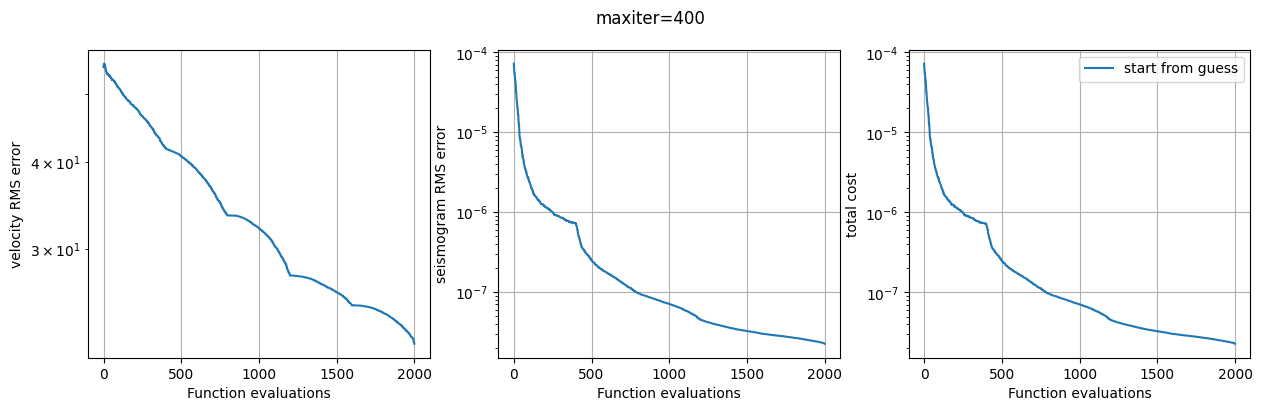

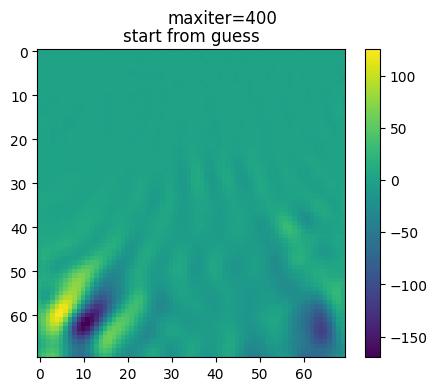

diag 1.9656961788752064e-05


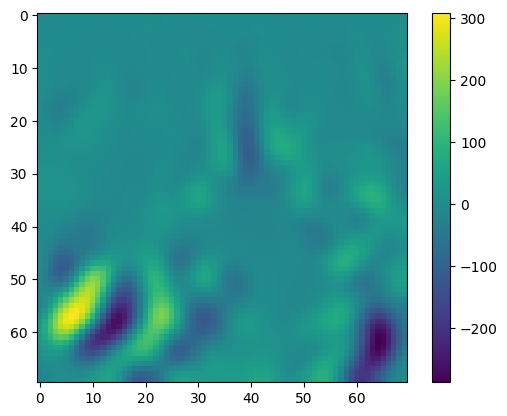

False True
(4901, 1073)
0.00043503787149956993
6.678962482771418e-13
gn 0.008755746334479142
151.79834849426587
(1073, 1)


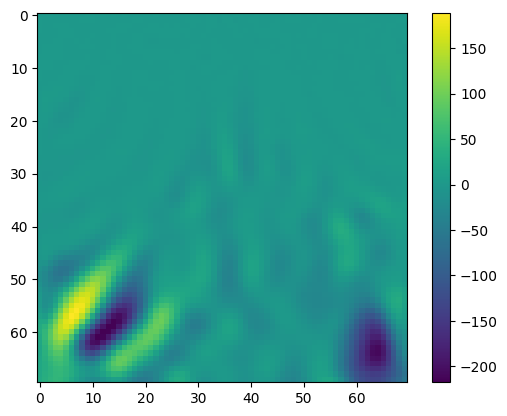

True True
(4901, 1073)
6.257814710418644e-06
6.670533849681711e-13
gn 0.000787131143349931
2.4960361332011516
(1073, 1)


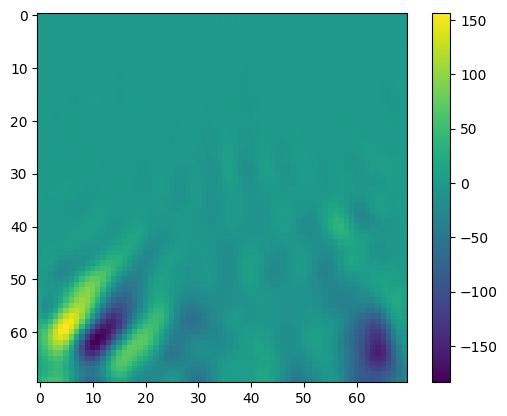

True True
(4901, 1073)
1.378163736935889e-07
6.702112650778943e-13
gn 0.00032352228362616083
0.27493101669450437
(1073, 1)


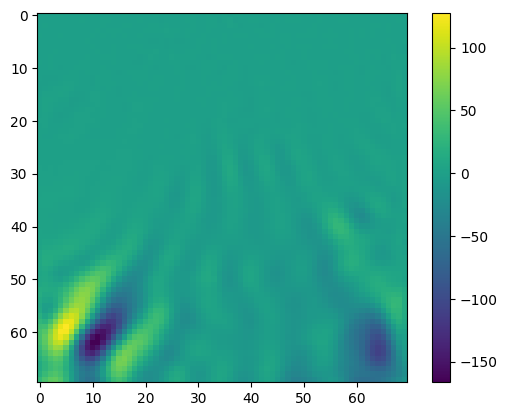

True True
(4901, 1073)
1.1255696220694374e-08
6.705710187304186e-13
gn 0.0002890268733180617
0.32130333928795374
(1073, 1)


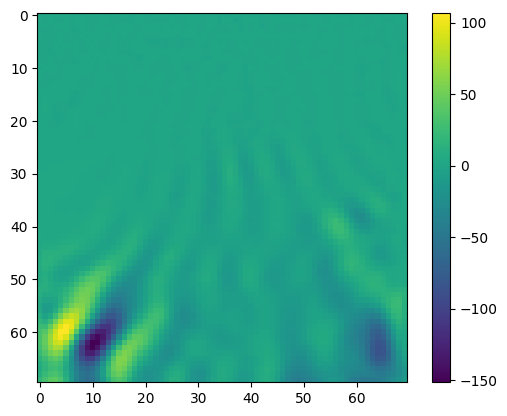

True True
(4901, 1073)
1.1865385042588723e-08
6.709463179810836e-13
gn 0.00027809623760026886
0.3179623786258091
(1073, 1)


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.state = 1
model.maxiter = 300
print('maxiter wrong')
model.history_size = 10000
model.prior = seis_prior.SquaredExponential()
model.prior.transform = True
model.prior.svd_cutoff = 1.
model.prior.λ = 10**-12
model.do_gn=True
model.show_convergence=True
model.iter_outer=5
#model.prior.basis_functions()
#KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#KK[-1,-1] = 10000.
#U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
#model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
#model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
#model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
#plt.figure()
#plt.imshow(cp.asnumpy(cp.log(cp.reshape(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],(70,70)))/cp.log(10)))
#plt.colorbar()
#model.prior.use_full=True

do_which_list = [False,False,True]

def param_func(model,value):
    # if value==1:
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     model.prior.transform=False
    #     model.prior.basis_functions()
        
    #     #KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #KK[-1,-1] = 10000.
    #     #U,s,_=cp.linalg.svd(model.prior.P+(1/model.prior.λ)*cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     U,s,_=cp.linalg.svd(cp.diag(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ')))[:-1],compute_uv=True)
    #     model.prec_matrix = (U@cp.diag(1/cp.sqrt(s)))
    #     model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     model.prec_matrix[-1,-1] = 1.
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     # U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
    #     # model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
    #     # model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     # model.prec_matrix[-1,-1] = 1.
    # #model.prior.transform = value
    # if value==2:
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     model.prior.transform=False
    #     #model.prior.basis_functions()
        
    #     #KK = cp.pad(model.prior.K, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #KK[-1,-1] = 10000.
    #     #U,s,_=cp.linalg.svd(model.prior.P+(1/model.prior.λ)*cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     #U,s,_=cp.linalg.svd(cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))[:-1],compute_uv=True)
    #     #model.prec_matrix = (U@cp.diag(1/cp.sqrt(s)))
    #     #model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     #model.prec_matrix[-1,-1] = 1.
    #     #model.prec_matrix = cp.diag(cp.sqrt(1/cp.diag(kgs.dill_load(kgs.temp_dir + 'JTJ'))))
    #     # U,s,_=cp.linalg.svd(model.prior.K,compute_uv=True)
    #     # model.prec_matrix = (U@cp.diag(cp.sqrt(s)))
    #     # model.prec_matrix = cp.pad(model.prec_matrix, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    #     # model.prec_matrix[-1,-1] = 1.
    model.maxiter = value
    return model
    
param_values = [200,400,600]
param_name = "maxiter"


for d in data[8000:8001]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [ ]:
%debug

In [ ]:
seis_forward2.show_profile(1)